<a href="https://colab.research.google.com/github/pushyag1/DeepLearningClass/blob/master/Chapter_1_Pytorch_Mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning, also called neural networks, or artificial neural networks, has become all the rage in recent years. Its lead to dramatic advances in the quality, accuracy, and usability machine learning. Technology that was considered impossible just 10 years ago is now widely deployed or considered technically possible, even if work remains. 
Digital assistants like Cortona, Google, Alex and Siri are ubiquitous and can react to natural spoken language. Self driving cars have been racking up millions of miles on the road as they are refined for eventual deployment. We can finally catalog and calculate just _how much_ of the Internet is made of cat photos. Deep Learning has been instrumental to the success of all of these use cases, and naturally is drawing a lot more attention from the public at large. In this book I will give you a wide breadth of exposure to the techniques commonly used in deep learning today, and the skills to start applying them to your own problems or to download new data and hone your skills. We are not going to go deep on the theory or derivations of deep learning, instead we will walk through the results, the intuition about them, and how to use them. 

That said, this book is _not_ a cook book of code snippets to just throw at any new problem. We will talk about some very advanced techniques, and build toward them in an incremental fashion. It is expected that you know and are familiar with programming in python, and have some passing memory of a calculus and a statistics course. You should also have taken at least one class on machine learning (ML). Topics from ML broadly will be quickly re-introduced, but our goal is to quickly move into new and interesting details about deep learning. 

Since I want you to develop a deeper understanding of deep learning, we are not going to start building any neural networks _just_ yet. For this first chapter, we are going to learn some foundations. The PyTorch library will be used throughout the book, and it has a particular approach to its design. Understanding the design will help remove some of the mystery about how deep learning is done, and how we can build and extend upon what we learn. 

We are also going to try and intermingle mathematically notation and code together, so that you can start to map equations to code. The goal is that you should eventually learn to read the mathematical notation or code in the same way you might read a paragraph. Any text you read `in this font indicates a mapping to code`. We try to give the variables in each code example useful names, as do the PyTorch developers. So when possible, we will use a code reference as the name we intend. For example, if we had an object that represented a sandwich, we might write out "You can construct a `sandwich` from `bread` and `cheese`" to indicate both the directions, but also map from English directly to the code examples we will write. 

# Getting Started with Colab

We will be using Graphics Processing Units (GPUs) for _everything_ we do with deep learning. It is unfortunately a computationally demanding practice, and GPUs are essentially a _requirement_ for getting started, and especially when you start to work on larger applications. I use deep learning all the time as part of my day-job, and regularly kick off jobs that take a few _days_ to train on multiple GPUs. Some of my research experiments take as much as _a month_ of compute for each run! 

Unfortunately, GPUs are also decently expensive. The best option currently for most people who want to get started with deep learning is to spend \$600-\$1200 on one of the higher end Nvidia GTX or Titan GPUs. That is _if_ you have a computer that can be expanded/upgraded with a high end GPU. If not, you are probably looking at at least \$1500-\$2500 to build a nice workstation to put those GPUs in. Thats a pretty steep cost just to _learn_ about deep learning!

As such, I've tired to make it so that you can run _every_ experiment and exercise problem in this book using just Google's Colab ( https://colab.research.google.com ). Colab is a service provided by Google, built on top of Jupyter notebooks, that provides an online python compute environment. As a part of Colab, you can also get temporary access to a GPU _for free_ ! This way you can get started learning about deep learning without such an expensive up-front cost. It even has PyTorch, and most of the libraries we will want to use, already installed and ready to go. Colab does not guarantee you a GPU, and eventually will put you in a low priority queue if you are using an excessive amount of GPU compute. If this happens, you may be allocated older/slower GPUs, or get an error message letting you know that no GPUs are available. If you just wait a few hours (or potentially a few days, depending on your usage and colab's demand), you should be able to access it again. 

While not required, I would encourage you to sign up for Colab Pro to make your life easier. Its available here : https://colab.research.google.com/signup , and does not fundamentally change how Colab works in any way. It simply gives you a higher priority for GPU access, and longer runtimes when using Colab. Colab pro is only \$10 a month, so a pretty good deal for portable GPU access and still far cheaper than diving into new hardware. In my experience teaching a course, grading homeworks, and helping students with their projects, I found Colab Pro meant that I always got a GPU without issue. 

To access a GPU with Colab, you should click the "Runtime" menu in the top of the webpage. You will then want to click on the "Change runtime type" option near the bottom. 

![](https://drive.google.com/uc?export=view&id=1KvMoed6Gco8EJCGHc11M6smt0aVYhcIx)


One selected you should see the window below. The default type of runtime is "None". You want to instead select "GPU". 

![](https://drive.google.com/uc?export=view&id=1A_EoigbHo2wnfkCsMvCTGvGDtM5FEdKh)

After hitting the "Save" button, you should now have access to an Nvidia GPU in your Colab session! You can double-check this by running the below command. 

```
!nvidia-smi
```

The "!" is a specicial function of a Jupyter notebook. Instead of running python code, it will instead run the code on the command line of the host computer. `nvidia-smi` is a program that gives you information about all the GPUs running in your computer, and their current utilization. 

![](https://drive.google.com/uc?export=view&id=1MH0uXdDuoy9hRrPgtv8T1YdTLwZSn2Ev)

When I ran this command, I got the above output indicating a Tesla P4 with 7.6 GB of RAM was allocated for my use. You may get different results when you run this, and thats OK. Not having exact control is the price we pay for a free GPU! 

Thats all that was needed for us to get ready to run some code with Colab. It also comes with most machine learning libraries pre-installed and ready to go. For example, we will regularly make use of `seaborn` and `matplotlib` for easy plotting / visualization of our results, and NumPy for our initial data loading and working with arrays in general. Pandas is another one we will use to make it simple to look at and examine our results. The `tqdm` library is another useful utility that will provide easy access to progress bars with an estimated completion time, like this:

![](https://drive.google.com/uc?export=view&id=19Qodawk-HK7Me3K-FxlNhjCSRbi8OAqx)

We can simply import these libraries and they are ready to go! All of these are common tools in a machine learning practitioner's tool belt, and you should have at least some familiarity with them before diving into this book. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


As we progress through this book, we are not going to repeatedly show all of the imports, as that is mostly a waste of paper. Instead they will be available on-line as part of the downloadable copies of the code, which can be found LINK GOES HERE ONCE READY. 

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# What is PyTorch?

Before we get into neural networks & deep learning, lets talk about PyTorch a bit first. In particular, what is it? Obviously, it is a a library for deep learning, as thats the whole point of this book. But what are the mechanics and tools PyTorch gives us? We want to understand these foundations first, as everything we do will build upon them.

We will begin by importing the torch library, and discussing _tensors_. Numpy and PyTorch are very similar in this regard. Both allow us to create n-dimensional arrays. A 0-dimensional array is called a _scalar_, and is any single number (e.g., "3.4123"). A 1-dimensional array is a _vector_ (e.g., [1.9, 2.6, 3.1, 4.0, 5.5]), and a 2-dimensional array is a _matrix_. Scalars, vectors, and matrices are all tensors. In fact, any value of $n$ is still a tensor! The word tensor is simply referring to the overall concept of an $n$-dimensional array. 

We care about tensors because they are a convenient way for us to organize much of our data, and our algorithms. This is the first foundation that PyTorch provides us, and we will often convert numpy to PyTorch tensors. So our first step, we will create four tensors matching the shapes below. 

![](https://drive.google.com/uc?export=view&id=10kow0FLR8QgtyVjGOD_Do9UyAncAbTtv "Tensors")

We will use some common notation to associate math symbols with tensors of a specific shape. We will use a capitol letter like $X$ or $Q$ to represent a tensor with two or more dimensions. If we are talking about a vector, we will use a lower case bold letter like $\boldsymbol{x}$ or $\boldsymbol{h}$. Last, we will use a lower case non-bold letter like $x$ or $h$ for scalars. 

In talking about and implementing neural networks, we often want to refer to a row within a larger matrix, or a scalar within a larger vector. So if we have a matrix $X$, we could use $\boldsymbol{x_i}$ to reference the $i$'th row of $X$. In code, that would be `x_i = X[i,:]`. If we wanted the $i$'th row and $j$'th column, that would become $x_{i,j}$, which is not bold because it is reference a single value - making it a scalar. Again, the code version of that would be `x_ij = X[i,j]`. 

To use PyTorch we will need to import it as the `torch` package. With it, we can immediately start creating some tensors! Every time you nest a list within another list, you are creating a new dimension to the tensor that PyTorch will produce. 

In [3]:
import torch

In [4]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,], 
                             [7, 8,]])
#You don't have to format it like I 
#did, thats just for clarity! 
torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3], 
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9], 
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15], 
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21], 
                            [22, 23, 24],
                            ]
                              ])

And if we print the shapes of these tensors out, you should see that you get the same shapes listed above. Again, while scalars, vectors, and matrices are different things, they are all unified under the larger umbrella of "tensors". We care about this because we will use tensors of difference shapes to represent different types of data. We will get to those details later, for now are are going to simply focus on the mechanics PyTorch provides to work with tensors. 

In [5]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


If you have done any machine learning or scientific computing in python, you have probably used the NumPy library. As you would expect, PyTorch supports converting these NumPy objects into their PyTorch counterparts. Since both of them represent data as tensors, this is a very painless process. 

In [6]:
x_np = np.random.random((4,4))
print(x_np)

[[0.22469741 0.3267468  0.51034486 0.68320803]
 [0.40921799 0.74171087 0.31317534 0.08583361]
 [0.36255859 0.65426418 0.3306036  0.64279756]
 [0.51039383 0.27122545 0.69552935 0.73172842]]


In [7]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.2247, 0.3267, 0.5103, 0.6832],
        [0.4092, 0.7417, 0.3132, 0.0858],
        [0.3626, 0.6543, 0.3306, 0.6428],
        [0.5104, 0.2712, 0.6955, 0.7317]], dtype=torch.float64)


Both numpy and torch support multiple different data types. By default, numpy will use 64-bit floats, and PyTorch will default to 32-bit floats. However, if you create a PyTorch tensor from a numpy one, it will use the same type as the given numpy tensor. You can see that above where PyTorch suddenly felt the need to let us know that `dtype=torch.float64`, since it is not the default choice. 

For deep learning, the most common types we will care about are 32-bit floats, 64-bit integers (Longs), and booleans (i.e., binary "True"/"False"). Most operations will leave the type of a tensor unchanged, unless we explicitly create or cast it to a new version. To avoid issues with types, you can always specify explicitly what type of tensor you want to create when calling a function. 

In [8]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [9]:
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


The main exception to this is logic operations, which we can use to quickly create binary masks. So lets say we wanted to find every value in a tensor that was greater than 0.5. Both PyTorch and NumPy would allow us to use the standard logic operators to check for things like this. 

In [10]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[False False  True  True]
 [False  True False False]
 [False  True False  True]
 [ True False  True  True]]
bool


In [11]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[False, False,  True,  True],
        [False,  True, False, False],
        [False,  True, False,  True],
        [ True, False,  True,  True]])
torch.bool


While the APIs between NumPy and PyTorch are not identical, they share many functions with the same names, behaviors, and characteristics. 

In [12]:
np.sum(x_np)

7.4940357

In [13]:
torch.sum(x_pt)

tensor(7.4940)

While many are the same, some are not _quite_ identical. There may be slight differences in behavior, or in the arguments required. These discrepancies are usually because the PyTorch version has made some changes that are particular to how these methods will be used for neural network design and execution. Below is an example of the transpose function, where PyTorch requires us to specific which two dimensions are to be transposed. NumPy simply takes the two dimensions and transposes them without complaint.  

In [14]:
x_np

array([[0.22469741, 0.3267468 , 0.51034486, 0.68320805],
       [0.40921798, 0.7417109 , 0.31317535, 0.08583362],
       [0.3625586 , 0.65426415, 0.3306036 , 0.6427975 ],
       [0.5103938 , 0.27122545, 0.69552934, 0.73172843]], dtype=float32)

In [15]:
np.transpose(x_np)

array([[0.22469741, 0.40921798, 0.3625586 , 0.5103938 ],
       [0.3267468 , 0.7417109 , 0.65426415, 0.27122545],
       [0.51034486, 0.31317535, 0.3306036 , 0.69552934],
       [0.68320805, 0.08583362, 0.6427975 , 0.73172843]], dtype=float32)

In [16]:
torch.transpose(x_pt, 1, 2) # And this would transpose a "batch" of multiple matricies all at once

IndexError: ignored

In this case, PyTorch does this because we often want to transpose different dimensions of the tensor for deep learning applications, where NumPy tries to stay with more general expectations. See below how we can "transpose" two of the dimensions in our `torch_tensor3d` from the start of the chapter. Originally it had a shape of $(4, 2, 3)$. If we transpose the first and third dimensions, we will get a shape of $(3, 2, 4)$. 

In [ ]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

Because such changes exist, you should always double check the PyTorch documentation at [https://pytorch.org/docs/stable/index.html](https://pytorch.org/docs/stable/index.html) if you attempt to use a function you are familiar with, but suddenly find it is not behaving as expected! Its also a good tool to generally have open when using PyTorch. There are a lot of different functions that can help you within PyTorch, and we simply can not review them all! 

## GPU Acceleration

The first important functionality that PyTorch gives us beyond what numpy can do is use a _Graphics Processing Unit_ (GPU) to accelerate mathematical calculations. 

### What is a GPU?

What are GPUs? They are hardware in your computer that is specifically designed for doing 2D and 3D graphics, mainly to accelerate videos (watching an HD movie) or play video grames. So what does that have to do with neural networks? Well, a lot of the math involved in making 2D and 3D graphics fast is tensor based, or at least related. For this reason, GPUs have been getting good at doing a lot of the things we want very quickly. As graphics, and thus GPUs, got better and more powerful, people realized they could also be used for a lot of scientific computing and machine learning! 

So at a high level, you can think of GPUs as giant tensor calculators. You should almost always use a GPU when doing anything with neural networks. Its a good pair up since neural networks are very compute intensive, and GPUs are fast at the exact type of computations we need to perform. If you want to do deep learning in a professional context, you should invest in a computer with a powerful Nvidia GPU. But for now, we can get by for _free_ using Colab! 

The trick to using GPUs effectively is to avoid computing on a _small_ amount of data. This is because your computer's CPU must first move data to the GPU, then ask the GPU to perform it's math, wait for the GPU to finish, and then copy the results back off the GPU. The steps surrounding this process are fairly slow, and take longer than it would for the CPU to do the math itself if we are only calculating a few things. 

What exactly counts as 'too small'? Well, that depends on your CPU, GPU, and the math you are doing. If you are worried about this problem, you can do some benchmarking to see if the CPU is coming out faster. If so, you are probably working on too little data! 

Lets test some of that out right now with a matrix multiplication! This is a pretty basic linear algebra operation that is very common in neural networks. Whats the math for this? We have a matrix $X^{n,m}$ and $Y^{m,p}$, and we can compute a resulting matrix $C^{n, p} = X^{n,m} Y^{m,p}$. Note that $C$ has as many rows as $X$ and as many columns as $Y$. When implementing neural networks, we are going to be doing lots of operations that change the _shape_ of a tensor, which we can see happens when we multiply two matrices together. This will be a common source of bugs, so you should think about tensor shapes when writing code!

Now, back to testing out these GPUs. Well use the _timeit_ library to help us, it allows us to run some code multiple times and tells us how long it took to run it. First we will make a larger matrix $X$, and we will compute $X X$ several times, and see how long that takes to run. 

In [ ]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=77)

In [ ]:
round(time_cpu, 3)

You should see it takes a bit of time to run that code, but not too long. On my computer it took {{round(time_cpu, 3)}} seconds to run, which is stored in the `time_cpu` variable. Now how do we get PyTorch to use our GPU? First we need to create a `device` reference. We can ask PyTorch to give us one using the `torch.device` function. If you have an Nvidia GPU, and the CUDA drivers are installed properly, you should be able to pass in `"cuda"` as a string and get a object back representing that device. 

In [ ]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

Now that we have a reference to the GPU (device) that we want to use, we just need to ask PyTorch to move that object to the given device. Luckily that can be done with a simple `to` function, and then we can use the same code as before! 

In [ ]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=77)

In [ ]:
round(time_gpu, 4)

In [ ]:
time_cpu/time_gpu

In [ ]:
x_.cpu() # x_.to(torch.device("cpu"))

When I run this code, I get the time to perform 100 multiplications as {{round(time_gpu, 4)}} seconds, which is an instant {{round(time_cpu/time_gpu, 2)}}$\times$ speedup! Now this was a pretty ideal case, as matrix multiplications are super efficient on GPUs, and we created a pretty big matrix. You should try making the matrix smaller and smaller and see how that impacts the speedup that you get. 

Something that we do need to be aware of is that this only works if every object involved is on the same device. Say you run the below code, where the variable `x` has been moved onto the GPU, and y has not (so it is on the CPU by default). 

```python
x = torch.rand(128, 128).to(device)
y = torch.rand(128, 128)
x*y
```

You will end up getting an error message that says:
```
RuntimeError: expected device cuda:0 but got device cpu
```
The error will tell you which device the first variable is on (`"cuda:0"`) but that the second variable was on a different device ('cpu'). If we instead wrote `y*x` you would see the error  change too `"expected device cpu but got device cuda:0"` instead. Whenever you see an error like this, you have a bug somewhere that kept your from moving everything to the same compute device! 

The other thing that we want to be aware of is how to convert our PyTorch data back to the CPU. For example, we may want to convert a tensor back to a NumPy array so that we can pass it to Matplotlib, or save it to disk. The PyTorch `tensor` object as a `.numpy()` method that will do this for you, but if you call `x.numpy()` right now, you will get the error:

```
TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu()
to copy the tensor to host memory first.
```
Instead, you can use the handy shortcut function `.cpu()` to move an object back to the CPU, where we can interact with it in a normal way. So you will often see code that looks like `x.cpu().numpy()` when we want to access the results of our work. 

THe `.to` and `.cpu()` methods make it easy to write code that is suddenly GPU accelerated. Once on a GPU or similar compute device, almost _every_ method that comes with PyTorch can be used and will net you a nice speedup! But sometimes we will want to store tensors and other PyTorch objects in a list, dictionary, or some other standard python collection. TO help us with that, we are going to define this `moveTo` function, which will recursevly go through the common python and PyTorch contains and move every device found onto the specified device. 

In [ ]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj
    
some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))

In [ ]:
torch.cuda.device_count()

You should see above that the first time we printed the arrays we saw a `tensor(1)` and `tensor(2)`, but after using the `moveTo` function we saw `device='cuda:0'` show up! We won't have to use this function often, but when we do, it will make our code easier to read and write. With that, we now have the fundamentals to write some _fast_ code accelerated by GPUs! 

# Automatic Differentiation

So far what we've seen is that PyTorch provides an API similar to numpy for performing mathematical operations on tensors, with the advantage of using a GPU to perform faster math operations when available. The second major foundation that PyTorch gives us is called _automatic differentiation_. What this means is, as so long as we use PyTorch provided functions,  PyTorch can compute derivatives and gradients automatically for us! 

Now your first thought might be "what is a gradient and why do I care about that?". We care because we can use the derivative of a function $f(x)$ to help us find an input $x^*$ that is a _minimizer_ of $f(x)$. This means the value of $f(x^*)$ will be smaller than $f(x^* + y)$ for whatever value we set $y$ to. The mathy way to say this would be to state that $f(x^*) \leq f(y),  \forall x \neq y$. 

$$f(\underbrace{x^*}_{\text{this specific value}}) \overbrace{\leq}^{\text{is as small as or smaller}} f(y), \underbrace{\forall}_{\text{for all cases where...}} \underbrace{y \neq x}_{y \text{ is not equal to } x}$$

Another way to say this is that if I wrote the below code, I would be stuck waiting for an infinite loop!
```python
while f(x_star) <= f(random.uniform(-1e100, 1e100)):
    pass
```

Why do we want to minimize a function? For all the kinds of machine learning and deep learning we will discuss in this course, we will train neural networks by defining a _loss function_. The loss function tells the network, in a numeric and quantifiable way, how _badly_ it is doing at the problem right now. So if the loss is high, things are going poorly. A high loss means the network is "losing the game", and badly!  If the loss is zero, the network has perfectly solved the problem! We don't usually allow the loss to go negative, because that gets confusing to think about. 

When you read math about neural networks, you will often see the loss function defined as $\ell(x)$, where $x$ are the inputs to the network, and $\ell(x)$ gives us the loss the network received. Because of this, _loss functions return scalars_. This is important, because we can compare scalars and say that one is definitively bigger or smaller than another, so it becomes unambiguous as to how "bad" a network is at the "game". 

So we have stated that gradients are helpful, and perhaps you remember from a calculus class about minimizing functions using derivatives and gradients. Lets do a little bit of a math reminder about how we can find the minimum of a function using calculus. 

Say we have the function $f(x) = (x-2)^2$, lets define that with some PyTorch code and plot what the function looks like. 

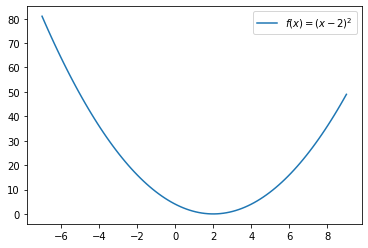

In [30]:
def f(x):
    return torch.pow((x-2.0), 2) 

x_axis_vals = np.linspace(-7,9,100) 
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x)=(x-2)^2$')

array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9.])

Ok, we can clearly see that the minimum of this function is at $x=2$, where we get the value of $f(2)=0$. But this is an intentionally easy problem, so lets say we couldn't plot it. We can use calculus to help us find the answer. 

We denote the derivative of $f(x)$ as $f'(x)$, and we can get the answer (using calculus) that $f'(x)=2 \cdot x - 4$. The minimum of a function ($x^*$) exists at _critical points_, which are points where $f'(x) = 0$. So lets find them by solving for $x$. In our case we get:

$$2 \cdot x - 4 = 0$$
$$2 \cdot x = 4 $$ (add 4 to both sides)
$$x = 4/2 = 2$$ (divide each side by 2)


Now this required us to solve the above equation for when $f'(x)=0$. PyTorch can't quite do that for us, because we are going to be developing more complicated functions where finding the _exact_ answer is not possible. But say we have a current guess $x^?$, where we are pretty sure that it is not the minimizer. We can use $f'(x^?)$ to help us know how to adjust $x^?$ so that we move closer to a minimizer. 


How is that possible? Lets plot $f(x)$ and $f'(x)$ at the same time.

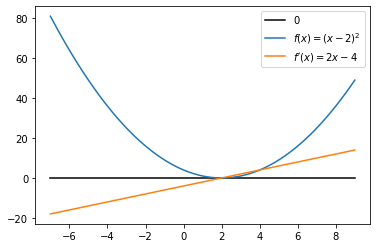

In [31]:
def fP(x): #Defining the derivative of f(x) manually
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x_axis_vals, [0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x_axis_vals, y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x_axis_vals, y_axis_vals_p, label="$f'(x)=2 x - 4$")

Look at the orange line. You should notice that when we are too far left of the minimum ($x=2$), we see that $f'(x^?)<0$. When we are to the right of the minimum we instead get that $f'(x)>0$. Only when we are at a minimum, do we see that $f'(x^?) = 0$. So if $f'(x^?)<0$ we need to increase $x^?$ and if $f'(^?x)>0$ we need to decrease the value of $x^?$. The _sign_ of the gradient $f'$ tells us which _direction_ we should move to find a minimizer! 

We also care about the _magnitude_ of $f'(x^?)$. Because we are looking at a one dimensional function, the magnitude just means the absolute value of $f'(x^?)$, i.e., $|f'(x^?)|$. The magnitude gives us an idea about how far away we are from the minimizer. So the sign of $f'(x^?)$ (<0 or >0) tells us which _direction_ we should head, and the size ($|f'(x)|$) tells us how _far_ we should head. 

This is not a coincidence. This will _always_ be true for any function. So if we can compute a derivative, we can find a minimizer. Now, you may be thinking, "I don't remember my calculus all that well..." or complaining that I skipped the steps on how to compute $f'(x)$. This is precisely why we use PyTorch, automatic differentiation will compute the value of $f'(x)$ for us! Lets use this toy example of $f(x)=(x-2)^2$ to see how it works. 

First, lets create a new variable that we want to minimize. We will do this similar to before, but we will add a new flag that tells PyTorch to start keeping track of the gradient. This gets stored in a variable called 'grad', which does not exist yet since we haven't actually computed anything. 

In [32]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


Ok, so we see there is no current gradient. Lets try computing $f(x)$ though and see if anything changes now that we set `requires_grad=True`. 

In [33]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


Now when we print the value of the returned variable, we get a slightly different output. We see the first part where the value "30.25" is printed, which is the correct value of $f(-3.5)$. But we also see this new `grad_fn=<PowBackward0>`. Once we tell PyTorch to start calculating gradients, it will begin to keep track of _every_ computation we do. It uses this information to go backwards and calculate the gradients for everything that was used and had a `requires_grad` flag set to `True`. 

Once we have a single _scalar_ value, we can tell PyTorch to go back and use this information to actualy compute the gradients. THisis done using the `.backward()` function, after which we will see there is now a gradient in our original object!

In [ ]:
value.backward()
print(x.grad)

That covers the mechanics of how PyTorch can compute gradients for us! Now we can use this automatic differentiation of our PyTorch function $f(x)$ to numerically find the answer that $f(2)=0$. FIrst we are going to describe it using a mathematically notation, and then again in actual code. 

We start with our current guess $x_{cur} = -3.5$. I've chosen 3.5 arbitrarily, in real life you would usually pick a random value.  We will also keep track of our previous guess using $x_{prev}$. Since we have not done anything yet, its fine to set the "previous" step to any large value (e.g., $x_{prev} = x_{cur}*100$). 

Next, we compare if our current and previous guesses are very similar. We do this by checking if $\|x_{cur}-x_{prev}\|_2 > \epsilon$. The function $\|z\|_2$ is called the _norm_ or _2-norm_. Norms are the most common and standard ways of measuring _magnitude_ for vectors and matrices. For one dimensional cases (like this one!), the 2-norm is the exact same thing as the absolute value.  If we do not explicitly state what kind of norm we are talking about, you should always assume the 2-norm. The value $\epsilon$ is a common mathematical notation to refer to some arbitrary small value. 

Ok, so now we know that $\|x_{cur}-x_{prev}\|_2 > \epsilon$ is how we check if there are large ($> \epsilon$) magnitude ($\|\cdot\|_2$) changes ($x_{cur}-x_{prev}$) between our guesses. If this is false, that means $\|x_{cur}-x_{prev}\|_2 \leq \epsilon$, whichs means the change was small, and that we can stop. Once we stop, we accept $x_cur$ as our answer to the value of $x$ that minimized $f(x)$! If not, we need a new _better_ guess! 

To get this new guess, we are going to move in the _opposite_ direction of the derivative. This looks like: $x_{cur} = x_{cur} - \eta \cdot f'(x_{cur})$. The value $\eta$ is called the _learning rate_ , and is usually a small value like $\eta=0.1$ or $\eta=0.01$. We do this because the gradient $f'(x)$ tells us which way to head, but only gives us a _relative_ answer about how far away we are. It doesn't tell us exactly how far we should travel in that direction. 

![step size](https://drive.google.com/uc?export=view&id=1vByqHbDFLxX36OEP49Dw8EXH9BMw5JYA)

So we prefer to take smaller steps in the current direction so that we don't "drive past" the answer, and have to turn back around. Look at the above example of our function to understand how that happens. If we have the _exactly_ correct best value of $\eta$ (middle image), we can take one step to the minimum! But we do not know what that value is. If we are instead conservative, and choose a value that is likely smaller than we need we may take more steps to get to the answer, but we will eventually get there (left image). But if we set our learning rate too high, we can end up shooting past the solution and bouncing around it instead (right image)!  


That might sound like a lot of scary math, but hopefully you will feel better about it when you look at the code that does the work. Its only a few lines long! At the end of the loop, we print out the value of $x_{cur}$ and see that it is equal to 2.0, PyTorch found the answer!

In [34]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100
epsilon = 1e-5
eta = 0.1

while torch.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object!
    
    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us
    
    #What are we currently now?
    x_cur = x.data
    
print(x_cur)

tensor([2.0000])


# Optimizing Parameters

What we just did, finding the minimum of a function $f(\cdot)$, is called _optimization_. Because we will specify the goal of our network using a loss function $\ell(\cdot)$, we can optimize $f(\cdot)$ to minimize our loss. If we reach a loss $\ell(\cdot) = 0$, that means our network (appears) to have perfectly solved the problem. This why why we care about optimization. This is foundational to how most modern neural networks are trained today. 

Because of how important optimization is, PyTorch includes some additional concepts to help us organize our code, and train a neural network. The first concept is that of a `Parameter`. A `Parameter` of a model is a value that we want to alter using optimization, so that we can try and reduce our loss $\ell(\cdot)$. We can easily convert any tensor into a `Parameter` using the `nn.Parameter` class. So to do that, lets re-solve the previous problem of minimizing $f(x) = (x-2)^2$ with an initial guess of $x_{cur} = 3.5$. The first thing we will do is create a `Parameter` object for the value of $x$, since that is what we are going to alter. 

In [35]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

The object `x_param` is now a `nn.Parameter`, which behaves the same way as Tensors do. We can use a `Parameter` anywhere that we would use a tensor in PyTorch and the code will work just fine. But now we can create an `Optimizer` object. The simplest optimizer we will use is called `SGD`, which stands for _Stochastic Gradient Descent_. The word "gradient" is there because we are using the gradients/derivatives of functions. "Descent" because we are minimizing or "descending" to a lower value of the function that we are minimized. We will get to the "stochastic" part in the next chapter! 

To use SGD, we simply need to create the associated object with a `list` of `Parameter`s that we want to adjust. We can also specify the learning rate $\eta$, or accept the default. The below code we will specify eta to match the original code above. 

In [36]:
optimizer = torch.optim.SGD([x_param], lr=eta)

Now we can re-write the previous ugly loop into something cleaner, that looks much closer to how we will train neural networks in practice. We will loop over the optimization problem a fixed number of times, which we often call _epochs_. The `zero_grad` method does the cleanup we did manually before for _every_ parameter that was passed in as an input. We compute our "loss", call `.backward()` on that loss, and then ask the optimizer to perform one `.step()` of the optimization. 

In [37]:
for epoch in range(60):
    optimizer.zero_grad() #x.grad.zero_()
    loss_incurred  = f(x_param)
    #f(inputs, parameters)
    loss_incurred.backward()
    optimizer.step() #x.data -= eta * x.grad
print(x_param.data)

tensor([2.0000])


And now you should see the code prints out {{x_param.data[0]}}, just like before! This will make our lives easier when we have literally _millions_ of parameters in our network. 

# Loading DataSet Objects

Now we have learned a little bit about the basic tools PyTorch provides us. We want to start training a neural network to solve our problems. But first, we need some data! Using the common notation of machine learning, we need a set of input data $X$ and associated output labels $\boldsymbol{y}$. In PyTorch we will represent that with a `Dataset` object.  Lets start by loading a familiar dataset from ScikitLearn, MNIST! We will convert it from a NumPy array to the form that PyTorch would like to see that data as. 

PyTorch uses a `Dataset` class to represent a dataset, and it encodes the information about:
1) How many items are in the dataset?
2) How to get the n'th item in the data set!
So lets go ahead and look at what that looks like!

In [ ]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

We can see that we have loaded the classic MNIST dataset with a total of 70,000 rows and 784 features. Now we will crease a simple Dataset class that takes in `X, y` as input. We need to define a `__getitem__` method, which will return the data and label as a `tuple(inputs, outputs)`. The `inputs` are the objects we want to give to our model as inputs, and the `outputs` are used for the output. We also need to implement the `__len__` function that returns how large the dataset is. 

In [ ]:
class SimpleDataset(Dataset):
        
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets 

    def __len__(self):
        return self.X.shape[0]
#Now we can make a PyTorch dataset! 
dataset = SimpleDataset(X, y)

Now we have a simple dataset object! It keeps the entire dataset in memory, which is OK for small datasets, but something we will want to fix in the future. We can confirm that the dataset still has 70,000 examples, and each example as 784 features, just as before. We can quickly confirm that the length and index functions we implemented work as expected. 

In [ ]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

The MNIST dataset is a dataset of hand drawn numbers. We can visualize this by re-shaping the data back into an image, just to confirm our data loader is working. 

In [ ]:
plt.imshow(example.reshape((28,28)))

## Creating a Training and Testing Split

Now we have _all_ our data in one dataset! However, like good machine learning practitioners, we should create a training and a testing split. In some cases we have a dedicated training and testing dataset. If that is the case, you should create two separate `Dataset` objects, one for training and one for testing, from the respective data sources. 

In this case, we just have one dataset. PyTorch has a simple utility that can help us break the corpus into a train and test split. Lets say we wanted 20% of the data to be used for testing, that could be done as follows using the `random_split` method. 

In [ ]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

And now we have a train and test set! In reality, the first 60,000 points are the standard training set for MNIST and the last 10,000 the standard test set. But the point was to show you the function for creating randomized splits yourself. 

With that, we have learned about all of the foundational tools that PyTorch provides. 

1. A NumPy like tensor API, which supports GPU acceleration. 
2. Automatic differentiation, which lets us solve optimization problems
3. An abstraction for datasets. 

We will start building on this foundation, and you may notice it starts to impact how you think about neural networks in the future. They do not magically do what is asked, but they try to numerically solve a goal specified by a loss function  $\ell(\cdot)$. We need to make sure we are careful in how we define or choose $\ell(\cdot)$, because that will determine what the algorithm learns. 

# HW 1, Due  September 14th, 2020, 1 minute before class starts. 

1. Write a series of `for` loops that compute the average value in `torch_tensor3d`
1. Write code that indexes into `torch_tensor3d` and prints out the value "13". 
1. For every power of 2 (i.e., $2^i$ or `2**i` ) up to $2^{11}$, create a random matrix $X \in \mathbb{R}^{2^i, 2^i}$ (i.e., `X.shape` should give `(2**i, 2**i)`). Time how long it takes to compute $X X$ (i.e., `X @ X`) on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU? 
2. We used PyTorch to find the numeric solution to $f(x) = (x-2)^2$. Write code that will find the solution to  $f(x)= \sin(x-2)\cdot(x+2)^2+\sqrt{\cos(x)}$. What answer do you get?
5. Affirm that you will not share the coure notebooks or images with any other person and will only use them for personal use.  Acknowledged!

In [ ]:
torch_tensor3d[1,1,0]